In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [3]:
aff_tal_df = pd.read_excel('ProjectGNS.xlsx', sheet_name='Sheet1')
healthcare_df = pd.read_excel('ProjectGNS.xlsx', sheet_name='Healthcare')
edu_df = pd.read_excel('ProjectGNS.xlsx', sheet_name='Education')
housing_df = pd.read_excel('ProjectGNS.xlsx', sheet_name='Housing,rental, leasing', index_col='NAME')

In [4]:
housing_df = housing_df.dropna()
# Converting the growth numbers into percentage growth
housing_df = housing_df.drop(columns=['Housing, renting, leasing- 2020'])
housing_df['Housing, renting, leasing-2021'] = housing_df['Housing, renting, leasing-2021'].apply(lambda x : x-100)
housing_df['Housing, renting, leasing-2022'] = housing_df['Housing, renting, leasing-2022'].apply(lambda x : x-100)
housing_df['Housing, renting, leasing-2023'] = housing_df['Housing, renting, leasing-2023'].apply(lambda x : x-100)
housing_df.head(50)

,"Housing, renting, leasing-2021","Housing, renting, leasing-2022","Housing, renting, leasing-2023"
NAME,,,
"Atlanta-Sandy Springs-Alpharetta, GA",10.2,8.4,16.7
"Austin-Round Rock-Georgetown, TX",6.0,18.0,28.9
"Baltimore-Columbia-Towson, MD",4.0,0.8,4.7
"Charlotte-Concord-Gastonia, NC-SC",6.0,18.7,24.9
"Dallas-Fort Worth-Arlington, TX",6.9,16.2,26.5
"Denver-Aurora-Lakewood, CO",6.5,10.8,19.3
"Houston-The Woodlands-Sugar Land, TX",5.4,14.0,23.1
"Jacksonville, FL",6.5,10.9,19.0
"Miami-Fort Lauderdale-Pompano Beach, FL",4.6,5.9,16.0


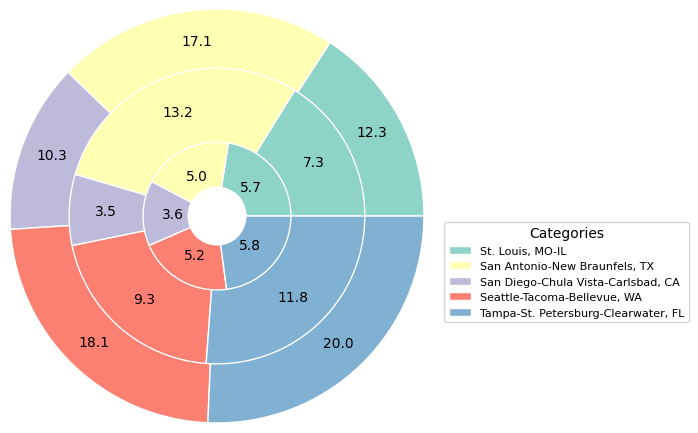

In [5]:
# Sample DataFrame (replace this with your actual data)
housing_df = housing_df.tail(5)

size_outer = 0.7
size_inner = 0.5  # Adjust the size of the inner pie chart as needed

colors = sns.color_palette('Set3', len(housing_df))

# Create a figure and a single subplot for the nested pie chart
fig, ax = plt.subplots()

def func(pct, allvalues):
    return round(pct/100.*sum(allvalues), 1)

# Plot the outer pie chart (Housing-2020)
wedges_outer, texts_outer, autotexts_outer = ax.pie(
    housing_df['Housing, renting, leasing-2023'],
    radius=1.4,
    pctdistance=0.85,
    colors=colors,
    autopct=lambda pct: func(pct, housing_df['Housing, renting, leasing-2023']),
    wedgeprops=dict(width=size_outer, edgecolor='w')
)

# Plot the outer pie chart (Housing-2020)
wedges_outer, texts_outer, autotexts_outer = ax.pie(
    housing_df['Housing, renting, leasing-2022'],
    radius=1,
    pctdistance=0.75,
    colors=colors,
    autopct=lambda pct: func(pct, housing_df['Housing, renting, leasing-2022']),
    wedgeprops=dict(width=size_outer, edgecolor='w')
)
ax.set(aspect='equal')

# Plot the inner pie chart (Housing-2019)
wedges_inner, texts_inner, autotexts_inner = ax.pie(
    housing_df['Housing, renting, leasing-2021'],
    radius=size_inner,
    colors=colors,
    autopct=lambda pct: func(pct, housing_df['Housing, renting, leasing-2021']),
    wedgeprops=dict(width=size_inner, edgecolor='w')
)

# Combine the legend for both pie charts
legend_labels = housing_df.index.values.tolist()
legend = ax.legend(
    legend_labels,
    title='Categories',
    loc='best',
    bbox_to_anchor=(1.1, 0.5),
    prop={'size': 8}  # Adjust the font size as needed
)

# Add a circle in the center to make it a donut chart
circle = plt.Circle((0, 0), 0.2, fc='white')
ax.add_artist(circle)
# plt.title('GDP growth in housing')
# Show the plot
plt.show()


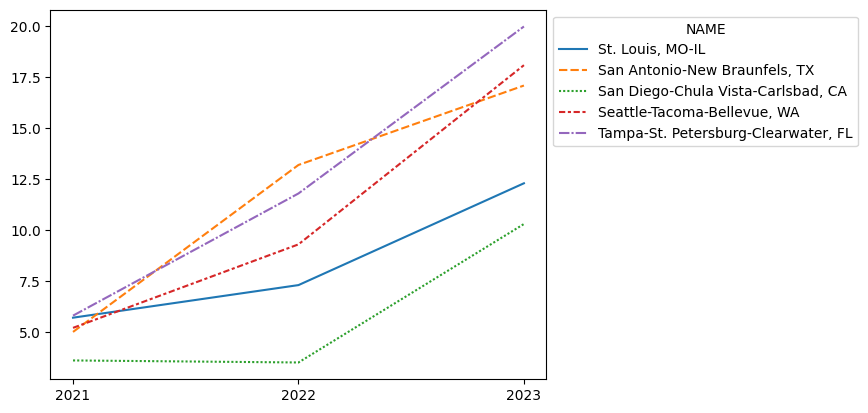

In [6]:
def plot_line_chart(df):
    # housing_dfT['NAME'] = housing_dfT['NAME'].apply(lambda x : x)
    # housing_dfT.head()
    ax = sns.lineplot(data=df, legend='brief')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    pass
# fig = plt.subplots(figsize=(50, 25))
# sns.set_theme(style='white', font_scale=3)
# housing_df = pd.read_excel('ProjectGNS.xlsx', sheet_name='Housing,rental, leasing', index_col='NAME')
# housing_df = housing_df.dropna()
# Converting the growth numbers into percentage growth
# housing_df = housing_df.drop(columns=['Housing, renting, leasing- 2018'])
housing_dfT = housing_df.T
housing_dfT = housing_dfT.rename(index={'Housing, renting, leasing-2021': '2021', 'Housing, renting, leasing-2022':'2022', 'Housing, renting, leasing-2023':'2023'})
plot_line_chart(housing_dfT)
#Tranforming the dataset to
# housing_df = housing_df.T


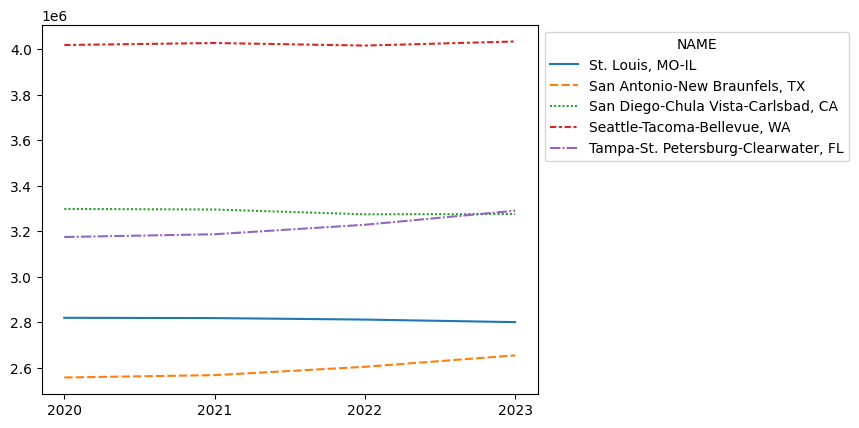

In [7]:
# Population growth in Tampa
# aff_tal_df
aff_tal_prec_df = aff_tal_df[['NAME', 'POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022', 'POPESTIMATE2023']].tail(5).set_index('NAME')
aff_tal_prec_df = aff_tal_prec_df.T
aff_tal_prec_df = aff_tal_prec_df.rename(index={'POPESTIMATE2020':'2020', 'POPESTIMATE2021': '2021', 'POPESTIMATE2022':'2022', 'POPESTIMATE2023':'2023'})
plot_line_chart(aff_tal_prec_df)

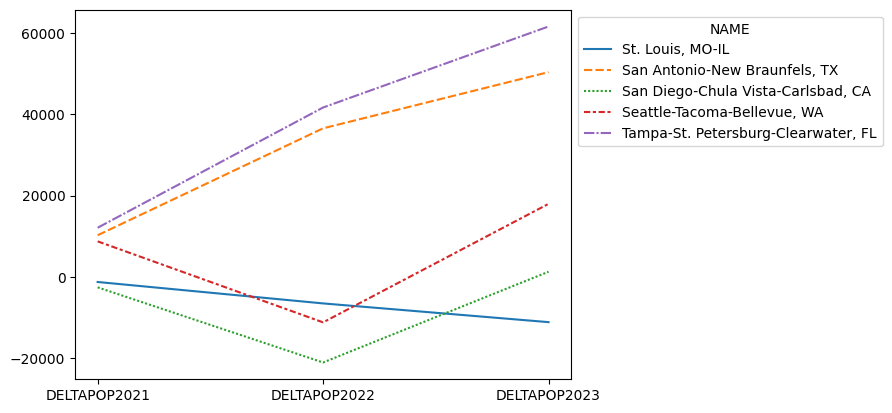

In [8]:
# Population growth in Tampa
# aff_tal_df
aff_tal_prec_df = aff_tal_df[['NAME', 'POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022', 'POPESTIMATE2023']].tail(5).set_index('NAME')
aff_tal_prec_df['DELTAPOP2021'] = aff_tal_prec_df['POPESTIMATE2021'] - aff_tal_prec_df['POPESTIMATE2020']
aff_tal_prec_df['DELTAPOP2022'] = aff_tal_prec_df['POPESTIMATE2022'] - aff_tal_prec_df['POPESTIMATE2021']
aff_tal_prec_df['DELTAPOP2023'] = aff_tal_prec_df['POPESTIMATE2023'] - aff_tal_prec_df['POPESTIMATE2022']
aff_tal_prec_df = aff_tal_prec_df.T
aff_tal_prec_df = aff_tal_prec_df.tail(3)
aff_tal_prec_df = aff_tal_prec_df.rename(index={'POPESTIMATE2020':'2020', 'POPESTIMATE2021': '2021', 'POPESTIMATE2022':'2022', 'POPESTIMATE2023':'2023'})
# sns.catplot(data=aff_tal_prec_df, kind='bar', x = )
plot_line_chart(aff_tal_prec_df)